https://en.wikipedia.org/wiki/DBFS  
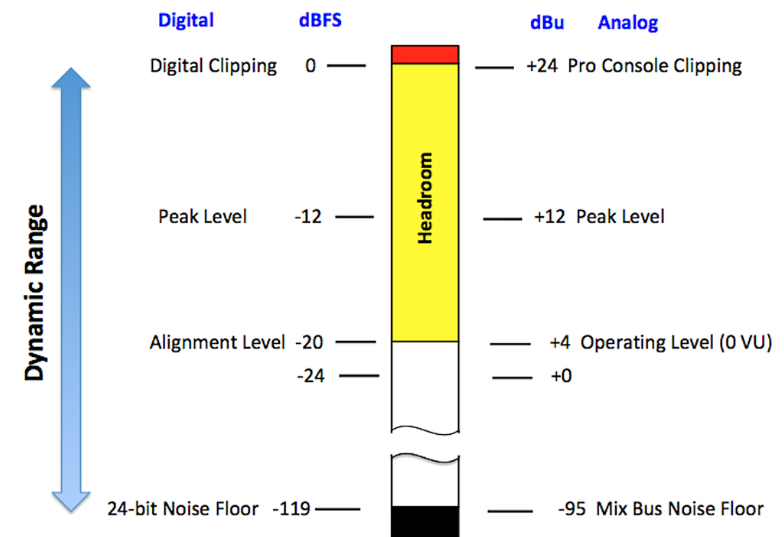

In [1]:
import glob,os
import librosa as rs
import numpy as np

import matplotlib.pyplot as plt   
import IPython.display as ipd

In [2]:
def norm_amplitude(y, scalar=None, eps=1e-6):
    if not scalar:
        scalar = np.max(np.abs(y)) + eps

    return y / scalar, scalar


def tailor_dB_FS(y, target_dB_FS=-25, eps=1e-6):
    rms = np.sqrt(np.mean(y ** 2))
    scalar = 10 ** (target_dB_FS / 20) / (rms + eps)
    y *= scalar
    return y, rms, scalar

In [3]:
target_dB_FS = -25
target_dB_FS_floating_value = 10
sr = 16000

## input

## -35

## -40

Text(0.5, 1.0, '-40')

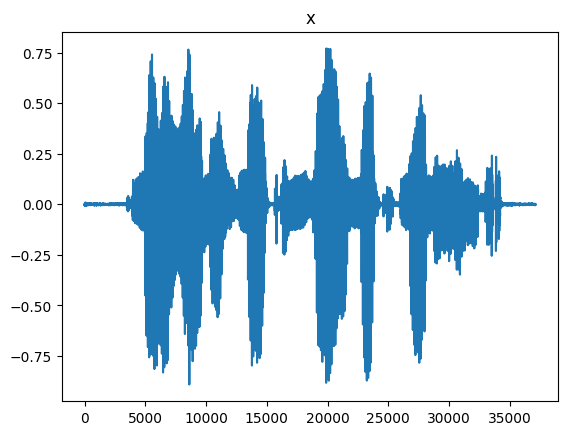

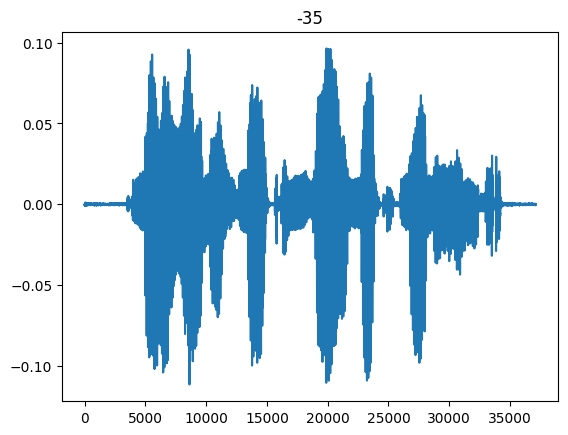

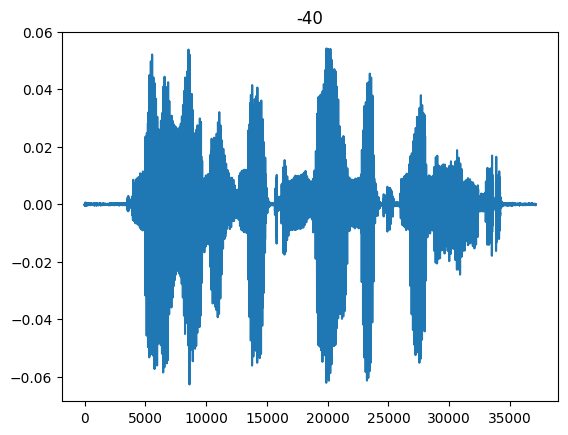

In [8]:
clean_y = rs.load("./data/male_1.wav",sr=sr)[0]

ipd.display(ipd.Markdown('## input'))
ipd.display(ipd.Audio(clean_y, rate=sr))

plt.figure()
plt.plot(clean_y)
plt.title("x")

clean_y, _ = norm_amplitude(clean_y)
clean_y, _, _ = tailor_dB_FS(clean_y, -35)
clean_rms = (clean_y ** 2).mean() ** 0.5

ipd.display(ipd.Markdown('## -35'))
ipd.display(ipd.Audio(clean_y, rate=sr))

plt.figure()
plt.plot(clean_y)
plt.title("-35")

SCALE = -40

clean_y, _ = norm_amplitude(clean_y)
clean_y, _, _ = tailor_dB_FS(clean_y, SCALE)
clean_rms = (clean_y ** 2).mean() ** 0.5

ipd.display(ipd.Markdown(f"## {SCALE}"))
ipd.display(ipd.Audio(clean_y, rate=sr))

plt.figure()
plt.plot(clean_y)
plt.title(f"{SCALE}")